# SOK-1006 Mikroøkonomi
## Seminar 4
### Oppgave 2

In [ ]:
# mesteparten av denne koden ble skrevet av Espen Sirnes

In [21]:
from sympy import *
from IPython.display import display

In [22]:
symbols("\lambda", real=True, positive=True)

\lambda

In [23]:
N, K, a, b, Z, w, r, c, lmda, x=symbols("N K a b Z w r C \lambda x", real=True, positive=True)
x_0=Z*N**a*K**b
x_0

K**b*N**a*Z

### deloppgave a)

Målet er å minimere $w N + r K$ for en gitt produksjon $x=K^b N^a Z$ med hensyn til $K$ og $N$. Lagrange er da $L=w N +r K - \lambda (K^b N^a Z-x_0)$

In [24]:
L=w*N + r*K-lmda*(x_0-x)#Kostnadsmin


In [25]:
dL_K=diff(L,K)
dL_N=diff(L,N)
display(dL_K)
display(dL_N)

r - K**b*N**a*Z*\lambda*b/K

-K**b*N**a*Z*\lambda*a/N + w

Hver av disse elementer kan kalles som arg i ei liste. For å finne plassen i listen kan du bruke "display (dL_K.args)" og "display (dL_N.args)":

In [26]:
display (dL_K.args)
display (dL_N.args)

(r, -K**b*N**a*Z*\lambda*b/K)

(w, -K**b*N**a*Z*\lambda*a/N)

Førsteordensbetingelsen sier at hver av disse skal være null, slik at $r = \lambda K^{b-1} N^a Z b$ og $w=\lambda K^b N^{a-1} Z a$. Deler vi hver side av disse ligningene på hverandre får vi henholdsvis

In [27]:
display(dL_K.args[0]/dL_N.args[0])
display(dL_K.args[1]/dL_N.args[1])

r/w

N*b/(K*a)

Disse må naturligvis også være like, så optimalt forhold er

In [28]:
display(Eq(
    N/K,
    a*r/(b*w)
))

Eq(N/K, a*r/(b*w))

Så $N=K \frac{a r}{b w}$:

In [29]:
N_sol=K*a*r/(b*w)
N_sol

K*a*r/(b*w)

Bedriften bruker mer kapital enn arbeidskraft dersom $1>\frac{N}{K}$, noe som innebærer $1>\frac{ar}{bw}$, dvs $\frac{w}{r}>\frac{a}{b}$.

### deloppgave b)
Vi skal altså sjekke om følgende to uttrykk er like:

In [30]:
display(log(x_0))
display(a*log(N) + b*log(K)+log(Z))

log(K**b*N**a*Z)

a*log(N) + b*log(K) + log(Z)

Vi kan gjøre det enten ved å omdanne det første til en form som det sistet uttrykket, eller motsatt. Vi velger førstnevnte, ved å ekspandere uttrykket:

In [31]:
log(x_0).expand(force=True)

a*log(N) + b*log(K) + log(Z)

Det ser ganske likt ut, men for å være sikker tester vi om de er like:

In [32]:
simplify(a*log(N) + b*log(K)+log(Z)==log(x_0).expand(force=True))

True

### deloppgave b2)

In [33]:
from numpy import random as rd
import numpy as np
import statsmodels as sm
import pandas as pd
import statsmodels.formula.api as smf
samp_size=100


K_obs=np.exp(rd.normal(3,1,samp_size))


df=pd.DataFrame({'N':np.exp(rd.normal(3,1,samp_size)), 
                 'K':np.exp(rd.normal(2,1,samp_size)), 
                 'Z':np.exp(rd.normal(0,1,samp_size))
                })

df['lnN']=np.log(df['N'])
df['lnK']=np.log(df['K'])
df['lnZ']=np.log(df['Z'])


df['lnx']=1.2*df['lnN']+1.1*df['lnK']+df['lnZ']

mod = smf.ols(formula='lnx ~ lnN + lnK', data=df)
res = mod.fit()
print(res.summary())
print(res.params)

                            OLS Regression Results                            
Dep. Variable:                    lnx   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     142.1
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           1.47e-29
Time:                        21:54:34   Log-Likelihood:                -151.09
No. Observations:                 100   AIC:                             308.2
Df Residuals:                      97   BIC:                             316.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1441      0.392      0.368      0.7

Legg merke til at res.params gir oss ei liste med koeffisienter. lnZ er res.params\[0\], a er res.params\[1\], b er res.params\[2\]. Vi kan bruke dette til å sette inn fra regresjonen i neste deloppgave.    
Summen av produksjonselastisitetene er 2.456599 > 1 og da viser produktfunksjonen stigende skalautbytte.     


### deloppgave c)

In [34]:
K_sol=solve(Eq((x_0).subs(N,K*a*r/(b*w)),x),K)[0]
N_sol=solve(Eq((x_0).subs(K,N*b*w/(a*r)),x),N)[0]
display(K_sol)
display(N_sol)

(b**a*w**a*x/(Z*a**a*r**a))**(1/(a + b))

(a**b*r**b*x/(Z*b**b*w**b))**(1/(a + b))

Kostnadsfunksonen får vi da fra $C=w L +r K$. Dette er uttrykket gitt som likning (4) i oppgave 2. Da kan vi definere kostnadsfunksjonen, gjennomsnittskostnad og grensekostnad, og så sette inn for w=350, r=500 (gitt i oppgaven), samt a, b og Z fra regresjonen ovenfor. Men legg merke til at res.params\[0\]=ln Z. For å finne Z må vi skrive om $e^{lnZ}=e^{res.params[0]}$, dvs $Z=e^{res.params[0]}$.

In [35]:
Z_num=np.exp(res.params[0])

In [36]:
from matplotlib import pyplot as plt

# definer funksjoner

C=lambdify(
    (w, r,x,Z,a,b), 
    w*N_sol+r*K_sol
)

avgC=lambdify(
    (w, r,x,Z,a,b), 
    (w*N_sol+r*K_sol)/x
)

dC=lambdify(
    (w, r,x,Z,a,b), 
    diff(w*N_sol+r*K_sol,x)
)

#sett inn verdier

print(C(350,500,x,Z_num,res.params[1],res.params[2]))
print(avgC(350,500,x,Z_num,res.params[1],res.params[2]))
print(dC(350,500,x,Z_num,res.params[1],res.params[2]))

780.167858691237*x**0.440816863443927
780.167858691237/x**0.559183136556073
343.911148428036/x**0.559183136556073


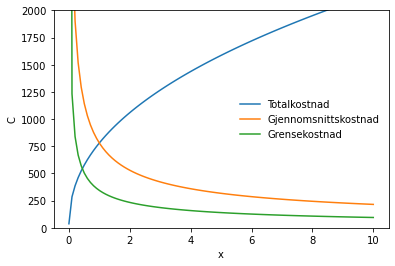

In [37]:
X = np.linspace(0.001,10,100)

fig,ax=plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('C')

ax.plot(X,
        C(350,500,X,Z_num,res.params[1],res.params[2])
        ,label='Totalkostnad')
ax.plot(X,
        avgC(350,500,X,Z_num,res.params[1],res.params[2])
        ,label='Gjennomsnittskostnad')
ax.plot(X,
        dC(350,500,X,Z_num,res.params[1],res.params[2])
        ,label='Grensekostnad')

ax.set_ylim([0, 2000])

ax.legend(loc='center right',frameon=False)

plt.show()